In [5]:
import geopandas as gpd

In [6]:
import os

In [5]:
path = r"T:\MPO\RTP\FY20 2045 Update\Data and Resources\Data\Coburg"

In [21]:
bikelane = gpd.read_file(os.path.join(path, "BikeLanes.shp"))

In [22]:
sidewalks = gpd.read_file(os.path.join(path, "Sidewalks.shp"))

In [9]:
newpaths = gpd.read_file(os.path.join(path, "NewHardSurfacePaths.shp"))

In [10]:
bikelane.columns

Index(['OBJECTID', 'FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'LENGTH',
       'AIRS0421_', 'AIRS0421_I', 'AIRS_ID', 'SEG_ID', 'LCPWID', 'EUGID',
       'SPRID', 'LCOGID', 'OWNER', 'MAINT', 'SOURCE', 'METHOD', 'FCLASS',
       'PAVED', 'DIR', 'NAME', 'TYPE', 'SPEED', 'ONE_WAY', 'F_ZLEV', 'T_ZLEV',
       'FT_COST', 'TF_COST', 'L_LADD', 'L_HADD', 'R_LADD', 'R_HADD',
       'AIRSNAME', 'AIRSCLASS', 'MAILCITY', 'MZONE', 'MIXED_PARI',
       'LEFT_PARIT', 'RIGHT_PARI', 'OVERLAP', 'CHANGE', 'SPLIT', 'ADJUST',
       'CONTRIBUTO', 'MESSAGE', 'LO_CROSS', 'HI_CROSS', 'X_OVRRDE', 'UGBCITY',
       'AIRSSPEED', 'RSPNSE_CLA', 'CAD_BNDRY_', 'JUNK', 'OID_', 'NAME_1',
       'FROM_', 'TO', 'LENGTH_1', 'FUNC_CLASS', 'LANES', 'WIDTH', 'CONDITIONS',
       'JURISDICTI', 'SIDEWALK__', 'SIDEWALK', 'BIKE______', 'ROW_______',
       'PARKING___', 'BUSROUTE', 'MRKD______', 'SPEED_____', 'SIGNED____',
       'PED_BIKE__', 'N20', 'N21', 'geometry'],
      dtype='object')

In [11]:
bikelane.head()

,OBJECTID,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,AIRS0421_,AIRS0421_I,AIRS_ID,SEG_ID,...,ROW_______,PARKING___,BUSROUTE,MRKD______,SPEED_____,SIGNED____,PED_BIKE__,N20,N21,geometry
0,1774,1572,1561,1,266,188.194765,1774,1774,1774,4006442,...,0,0,ROUTE96,BIKELANE,40,TRUCKRTE,NONE,None,118,"LINESTRING (4247897.585 909829.441, 4247806.96..."
1,1795,1593,1572,1,266,330.353442,1795,1795,1795,4006461,...,0,0,ROUTE96,BIKELANE,40,TRUCKRTE,NONE,None,119,"LINESTRING (4248076.519 909551.743, 4247897.58..."
2,1610,1439,1415,241,246,302.838807,1610,1610,1610,4006289,...,0,0,NONE,BIKELANE,25,TRUCKRTE,BOTHSIDES,None,101,"LINESTRING (4247397.710 911318.253, 4247349.33..."
3,1641,1465,1439,241,250,318.296849,1641,1641,1641,4000113,...,0,0,ROUTE96,BIKELANE,25,TRUCKRTE,BOTHSIDES,None,97,"LINESTRING (4247512.710 911021.503, 4247450.08..."
4,1669,1489,1465,1,258,348.015137,1669,1669,1669,4006339,...,0,0,ROUTE96,BIKELANE,25,TRUCKRTE,BOTHSIDES,None,102,"LINESTRING (4247613.210 910689.003, 4247610.71..."


In [12]:
newpaths.head()

,Id,Notes,geometry
0,0,Hard surface trail,"LINESTRING (4249298.703 912012.537, 4249326.88..."
1,0,Sidewalk,"LINESTRING (4250546.891 909924.525, 4250522.25..."
2,0,Hard surface trail,"LINESTRING (4250124.026 910444.264, 4250150.57..."


In [24]:
bikelane.rename(columns = {'OBJECTID': 'Id'}, inplace =True)

In [25]:
sidewalks.rename(columns = {'OBJECTID': 'Id'}, inplace =True)

In [20]:
newpaths['Id'] = ['n1', 'n2', 'n3']

In [26]:
bikelane_updated = bikelane[['Id', 'geometry']].append(newpaths[['Id', 'geometry']])

In [27]:
sidewalks_updated = sidewalks[['Id', 'geometry']].append(newpaths[['Id', 'geometry']])

In [15]:
bikelane_updated.shape

(22, 2)

In [19]:
sidewalks_updated.shape

(151, 2)

In [28]:
bikelane_updated.to_file(os.path.join(path, "Coburg_bikelanes.shp"))

In [29]:
sidewalks_updated.to_file(os.path.join(path, "Coburg_sidewalks.shp"))

In [30]:
bikelane_updated.crs

<Projected CRS: EPSG:2914>
Name: NAD83(HARN) / Oregon South (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: USA - Oregon - SPCS - S
- bounds: (-124.6, 41.98, -116.9, 44.56)
Coordinate Operation:
- name: SPCS83 Oregon South zone (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [31]:
import matplotlib.pyplot as plt
import contextily as ctx

In [32]:
bikelane = bikelane.to_crs(epsg=3857)
sidewalks = sidewalks.to_crs(epsg=3857)
newpaths = newpaths.to_crs(epsg=3857)

In [34]:
UGBbd = gpd.read_file(r"C:\Users\clid1852\OneDrive - lanecouncilofgovernments\data\Boundaries\UGB.shp")

In [36]:
COBbd = UGBbd[UGBbd.ugbcity == 'COB']

In [38]:
COBbd = COBbd.to_crs(epsg=3857)

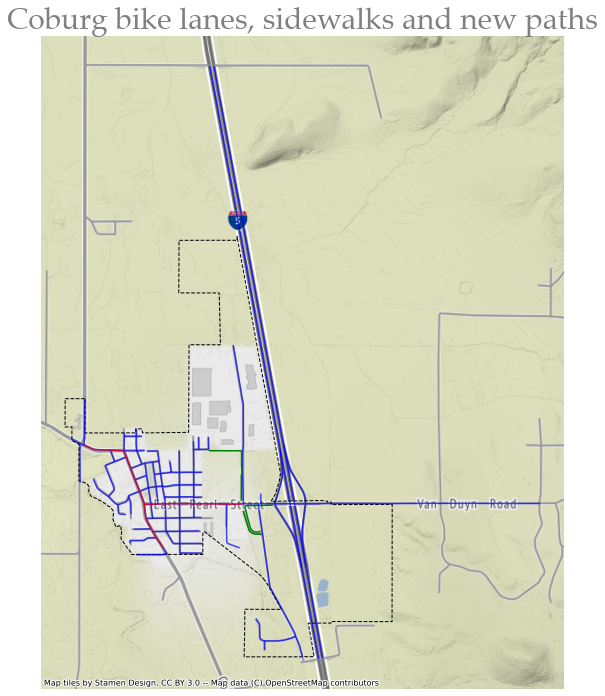

In [39]:
fig, ax = plt.subplots(figsize=(14, 12))
sidewalks.plot(ax=ax, color='blue', alpha = 0.7, aspect=1)
bikelane.plot(ax=ax, color='red', alpha = 0.7, aspect=1)
newpaths.plot(ax=ax, color='green', aspect=1)
COBbd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
ctx.add_basemap(ax)
plt.title("Coburg bike lanes, sidewalks and new paths", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [40]:
COBbd.to_file(os.path.join(path, "Coburg.shp"))

In [3]:
import arcpy, os

In [6]:
arcpy.analysis.Clip(os.path.join(path, "Sidewalks.shp"), 
                    os.path.join(path, "Coburg.shp"), 
                    os.path.join(path, "SidewalksCOB.shp"))

<Result 'T:\\MPO\\RTP\\FY20 2045 Update\\Data and Resources\\Data\\Coburg\\SidewalksCOB.shp'>

In [7]:
from arcpy import env

In [8]:
env.overwriteOutput = True

In [9]:
arcpy.analysis.Clip(os.path.join(path, "Coburg_sidewalks.shp"), 
                    os.path.join(path, "Coburg.shp"), 
                    os.path.join(path, "Coburg_sidewalksCOB.shp"))

<Result 'T:\\MPO\\RTP\\FY20 2045 Update\\Data and Resources\\Data\\Coburg\\Coburg_sidewalksCOB.shp'>

In [41]:
sidewalksCOB = gpd.read_file(os.path.join(path, "SidewalksCOB.shp"))

In [43]:
sidewalksCOB = sidewalksCOB.to_crs(epsg=3857)

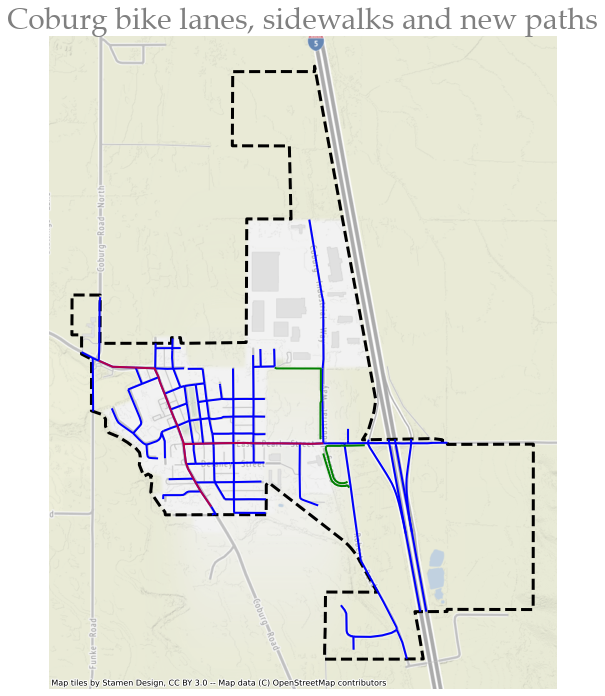

In [48]:
fig, ax = plt.subplots(figsize=(14, 12))
sidewalksCOB.plot(ax=ax, color='blue', linewidth = 2, aspect=1)
bikelane.plot(ax=ax, color='red', linewidth = 2, alpha = 0.7, aspect=1)
newpaths.plot(ax=ax, color='green', linewidth = 2, aspect=1)
COBbd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 3, aspect=1)
ctx.add_basemap(ax, alpha = 0.6)
plt.title("Coburg bike lanes, sidewalks and new paths", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");